In [1]:
import cv2
import matplotlib.pyplot as plt

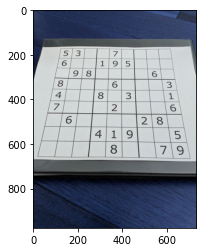

In [2]:
test_image  = cv2.imread('test_image.jpg')
plt.imshow(test_image)

In [9]:
def process_image(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(5,5),1)
    img = cv2.adaptiveThreshold(img,)
    return img

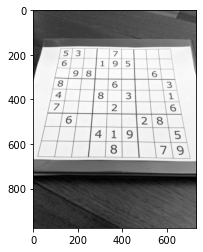

In [10]:
processed_image = process_image(test_image)
plt.imshow(processed_image, cmap='gray')